In [1]:
pip install pandas numpy scikit-learn matplotlib seaborn

In [2]:
import pandas as pd

data = pd.read_csv('/content/dermatology_database_1.csv')

# Display the first few rows of the dataset
print(data.head())

   erythema  scaling  definite_borders  itching  koebner_phenomenon  \
0         2        2                 0        3                   0   
1         3        3                 3        2                   1   
2         2        1                 2        3                   1   
3         2        2                 2        0                   0   
4         2        3                 2        2                   2   

   polygonal_papules  follicular_papules  oral_mucosal_involvement  \
0                  0                   0                         0   
1                  0                   0                         0   
2                  3                   0                         3   
3                  0                   0                         0   
4                  2                   0                         2   

   knee_and_elbow_involvement  scalp_involvement  ...  \
0                           1                  0  ...   
1                           1         

In [3]:
import numpy as np

# Replace '?' with NaN
data.replace('?', np.nan, inplace=True)

# Convert columns to numeric, forcing errors to NaN
data = data.apply(pd.to_numeric, errors='coerce')

# Optionally, you can fill NaN values with the mean of each column
data.fillna(data.mean(), inplace=True)

# Check for any remaining NaN values
print(data.isnull().sum())

erythema                               0
scaling                                0
definite_borders                       0
itching                                0
koebner_phenomenon                     0
polygonal_papules                      0
follicular_papules                     0
oral_mucosal_involvement               0
knee_and_elbow_involvement             0
scalp_involvement                      0
family_history                         0
melanin_incontinence                   0
eosinophils_infiltrate                 0
PNL_infiltrate                         0
fibrosis_papillary_dermis              0
exocytosis                             0
acanthosis                             0
hyperkeratosis                         0
parakeratosis                          0
clubbing_rete_ridges                   0
elongation_rete_ridges                 0
thinning_suprapapillary_epidermis      0
spongiform_pustule                     0
munro_microabcess                      0
focal_hypergranu

1. Split the data into train and test, train SVM and RF


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Split the data into features and target
X = data.drop('class', axis=1)  # Assuming 'class' is the target column
y = data['class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Train Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Print results
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

SVM Classification Report:
              precision    recall  f1-score   support

           1       0.94      0.97      0.95        31
           2       0.35      1.00      0.51         9
           3       1.00      1.00      1.00        13
           4       0.00      0.00      0.00         8
           5       0.00      0.00      0.00        10
           6       0.67      0.67      0.67         3

    accuracy                           0.73        74
   macro avg       0.49      0.61      0.52        74
weighted avg       0.64      0.73      0.66        74

SVM Accuracy: 0.7297297297297297
Random Forest Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        31
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00        13
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00        10
           6       1.00      1.00  

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


2. Find and remove outliers, then train SVM and Rf again

In [5]:
# Find outliers using IQR
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1

# Define outlier condition
outlier_condition = (X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))

# Remove outliers
X_no_outliers = X[~outlier_condition.any(axis=1)]
y_no_outliers = y[X_no_outliers.index]

# Split the new data into training and testing sets
X_train_no_outliers, X_test_no_outliers, y_train_no_outliers, y_test_no_outliers = train_test_split(
    X_no_outliers, y_no_outliers, test_size=0.2, random_state=42
)

# Train SVM without outliers
svm_model_no_outliers = SVC()
svm_model_no_outliers.fit(X_train_no_outliers, y_train_no_outliers)
y_pred_svm_no_outliers = svm_model_no_outliers.predict(X_test_no_outliers)

# Train Random Forest without outliers
rf_model_no_outliers = RandomForestClassifier()
rf_model_no_outliers.fit(X_train_no_outliers, y_train_no_outliers)
y_pred_rf_no_outliers = rf_model_no_outliers.predict(X_test_no_outliers)

# Print results
print("SVM without Outliers Classification Report:")
print(classification_report(y_test_no_outliers, y_pred_svm_no_outliers))
print("SVM without Outliers Accuracy:", accuracy_score(y_test_no_outliers, y_pred_svm_no_outliers))

print("Random Forest without Outliers Classification Report:")
print(classification_report(y_test_no_outliers, y_pred_rf_no_outliers))
print("Random Forest without Outliers Accuracy:", accuracy_score(y_test_no_outliers, y_pred_rf_no_outliers))

SVM without Outliers Classification Report:
              precision    recall  f1-score   support

           2       0.00      0.00      0.00         4
           4       0.33      1.00      0.50         2

    accuracy                           0.33         6
   macro avg       0.17      0.50      0.25         6
weighted avg       0.11      0.33      0.17         6

SVM without Outliers Accuracy: 0.3333333333333333
Random Forest without Outliers Classification Report:
              precision    recall  f1-score   support

           2       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         2

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6

Random Forest without Outliers Accuracy: 1.0


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
3. Plot Histograms for each column

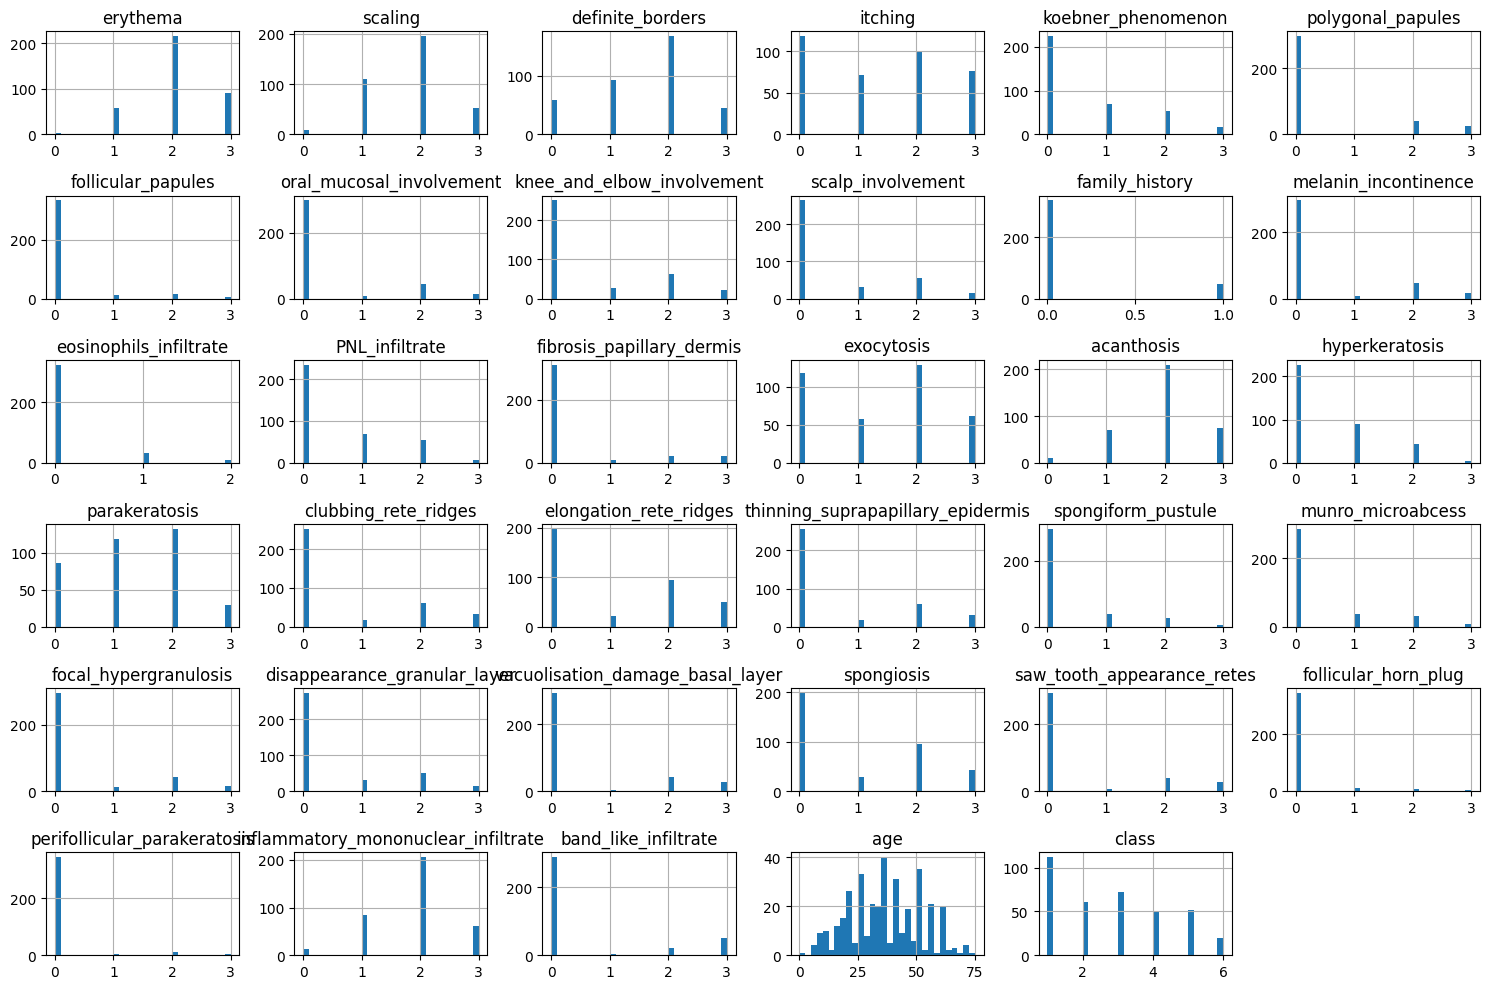

In [6]:
import matplotlib.pyplot as plt

# Plot histograms for each column
data.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()